In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\elizabeth\Documents\Luca's scraping\standardised_cyber_tweets_19082020.csv")

In [8]:
#preprocessing - first glanses at the data 
column_names = list(df.columns)
unique_values = list()
for col in df:
    unique_values.append(df[col].unique())
number_unique_values = list()
for col in df:
    number_unique_values.append(len(df[col].unique()))

#a summary table fo unique information 
summary_table = pd.DataFrame(column_names)
summary_table.columns=['column names']
summary_table['unique values'] = unique_values
summary_table['number of unique values'] = number_unique_values
summary_table

,column names,unique values,number of unique values
0,tweet_id,"[1289299875943735297, 1289268681286000641, 128...",12058
1,conversation_id,"[1289299875943735297, 1289268681286000641, 128...",7408
2,in_reply_to_status_id,[nan],1
3,reply_to,"[[{'user_id': '244169661', 'username': 'jennys...",3445
4,in_reply_to_user_id,[nan],1
5,in_reply_to_screen_name,[nan],1
6,user_id,"[244169661, 21644992, 19883587, 242355547, 165...",12
7,screen_name,"[jennystrasburg, dannsimmons, leokelion, gordo...",12
8,tweet_created_at,"[2020-07-31 22:40:19, 2020-07-31 20:36:21, 202...",12003
9,text,"[Arrests: Several prominent accounts, includin...",11876


In [23]:
df_like_count = df.groupby('screen_name')[['replies_count', 'retweets_count', 'likes_count']].sum()
df_number_tweets = df.groupby('screen_name')['text'].count()
df_like_count['number_tweets'] = df_number_tweets
df_like_count

,replies_count,retweets_count,likes_count,number_tweets
screen_name,,,,
_lucyingham,155,122,694,234
ad_nauseum74,11,16,44,57
dannsimmons,160,152,726,88
dannyjpalmer,4664,1453,12909,6564
gordoncorera,678,5549,9761,288
jennystrasburg,318,1046,2207,772
jesscahaworth,12,14,49,38
joetidy,2549,4221,11265,1262
leokelion,1216,2967,6936,761


In [25]:
df2 = pd.read_csv(r"C:\Users\elizabeth\Documents\Luca's scraping\cyber_user_profiles.csv")
#preprocessing - first glanses at the data 
column_names = list(df.columns)
unique_values = list()
for col in df:
    unique_values.append(df[col].unique())
number_unique_values = list()
for col in df:
    number_unique_values.append(len(df[col].unique()))

#a summary table fo unique information 
summary_table = pd.DataFrame(column_names)
summary_table.columns=['column names']
summary_table['unique values'] = unique_values
summary_table['number of unique values'] = number_unique_values
summary_table

,column names,unique values,number of unique values
0,user_id,"[363675945, 2546033492, 179178993, 1325420790,...",18911
1,screen_name,"[robahusseini, hashemosseiran, liveanthony, el...",18911
2,name,"[Roba El Husseini ربى, Hashem Osseiran, Anthon...",18739
3,location,"[Lebanon, Beirut, New York, NY, Albuquerque, N...",5097
4,user_description,[Journalist @AFP covering Syria and Lebanon. T...,18174
5,user_friends_n,"[1244, 1678, 454, 741, 4931, 850, 2128, 298, 4...",5032
6,user_followers_n,"[2567, 2003, 2303, 1566, 95042, 44841, 426025,...",12859
7,prof_created_at,"[2011-08-28 14:13:43, 2014-06-04 12:41:32, 201...",18910
8,favourites_count,"[649, 493, 3920, 3552, 6969, 73, 35251, 1270, ...",9418
9,verified,"[False, True]",2


In [34]:
df_user_metrics = pd.merge(df2, df_like_count, how='inner', on='screen_name')
df_user_metrics.head(0:12)

,user_id,screen_name,name,location,user_description,user_friends_n,user_followers_n,prof_created_at,favourites_count,verified,statuses_count,replies_count,retweets_count,likes_count,number_tweets
0,38427411,dannyjpalmer,Danny Palmer,"London, England",Senior reporter at @ZDNet. Articles and videos...,889,7423,2009-05-07 13:14:38,4941,True,80444,4664,1453,12909,6564
1,19883587,leokelion,Leo Kelion,London,Technology desk editor of BBC News. Recently w...,4768,11852,2009-02-01 23:40:21,3456,True,4155,1216,2967,6936,761
2,16527091,joetidy,Joe Tidy,DMs Open,Cyber Reporter for BBC News. Covering cyber-se...,2722,10945,2008-09-30 12:51:28,8422,True,13491,2549,4221,11265,1262
3,21644992,dannsimmons,Dan Simmons,"London, England",BBC Technology Reporter on @bbcclick. Speciali...,295,12478,2009-02-23 10:53:15,835,True,2247,160,152,726,88
4,242355547,gordoncorera,Gordon Corera,NaN,BBC Security Correspondent. Author: 'Russians ...,1280,13632,2011-01-24 15:59:31,239,False,1783,678,5549,9761,288
5,284194876,mshannahmurphy,Hannah Murphy,"San Francisco, CA","Tech reporter @FT writing on Facebook, TikTok,...",1329,6049,2011-04-18 20:30:19,5851,True,3270,430,2955,6814,236
6,244169661,jennystrasburg,jenny strasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2841,5565,2011-01-28 17:33:33,4987,True,8427,318,1046,2207,772
7,1186245031507693574,ad_nauseum74,Adam Bannister,NaN,"Journalist, The Daily Swig. Cybersecurity.",365,132,2019-10-21 11:38:12,111,False,275,11,16,44,57
8,964233746865119233,jesscahaworth,Jessica Haworth,NaN,Cybersecurity journalist at @DailySwig. Music ...,968,666,2018-02-15 20:23:34,448,False,570,12,14,49,38


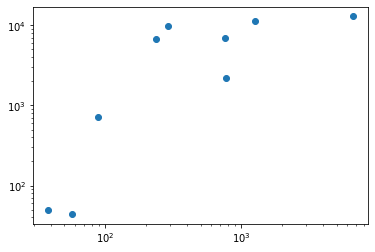

In [30]:
import matplotlib.pyplot as plt

plt.scatter(df_user_metrics['number_tweets'], df_user_metrics['likes_count'])
plt.yscale('log')
plt.xscale('log')

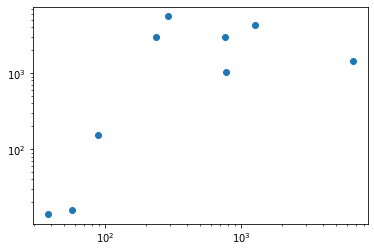

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df_user_metrics['number_tweets'], df_user_metrics['retweets_count'])
plt.yscale('log')
plt.xscale('log')

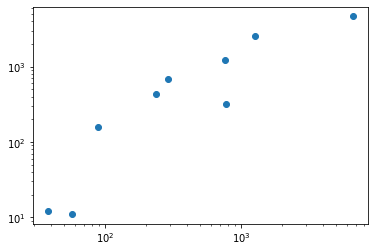

In [33]:
import matplotlib.pyplot as plt

plt.scatter(df_user_metrics['number_tweets'], df_user_metrics['replies_count'])
plt.yscale('log')
plt.xscale('log')

In [35]:
df_user_metrics['engagement_metric'] = (df_user_metrics['likes_count'] + df_user_metrics['retweets_count'])/(df_user_metrics['number_tweets']*df_user_metrics['user_followers_n'])

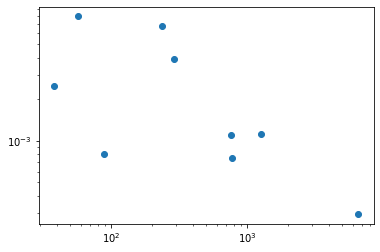

In [36]:
plt.scatter(df_user_metrics['number_tweets'], df_user_metrics['engagement_metric'])
plt.yscale('log')
plt.xscale('log')